In [1]:
import matplotlib
import pandas as pd
import aggregate_data, list_data, process_data
from hamilton import driver
from hamilton.execution import executors

/Users/elijahbenizzy/.pyenv/versions/3.9.10/envs/hamilton/lib/python3.9/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
%matplotlib inline

In [3]:
dr = driver.Builder(). \
        enable_dynamic_execution(allow_experimental_mode=True) \
        .with_remote_executor(executors.MultiThreadingExecutor(max_tasks=100)) \
        .with_local_executor(executors.SynchronousLocalTaskExecutor()) \
        .with_modules(aggregate_data, list_data, process_data) \
        .build()

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


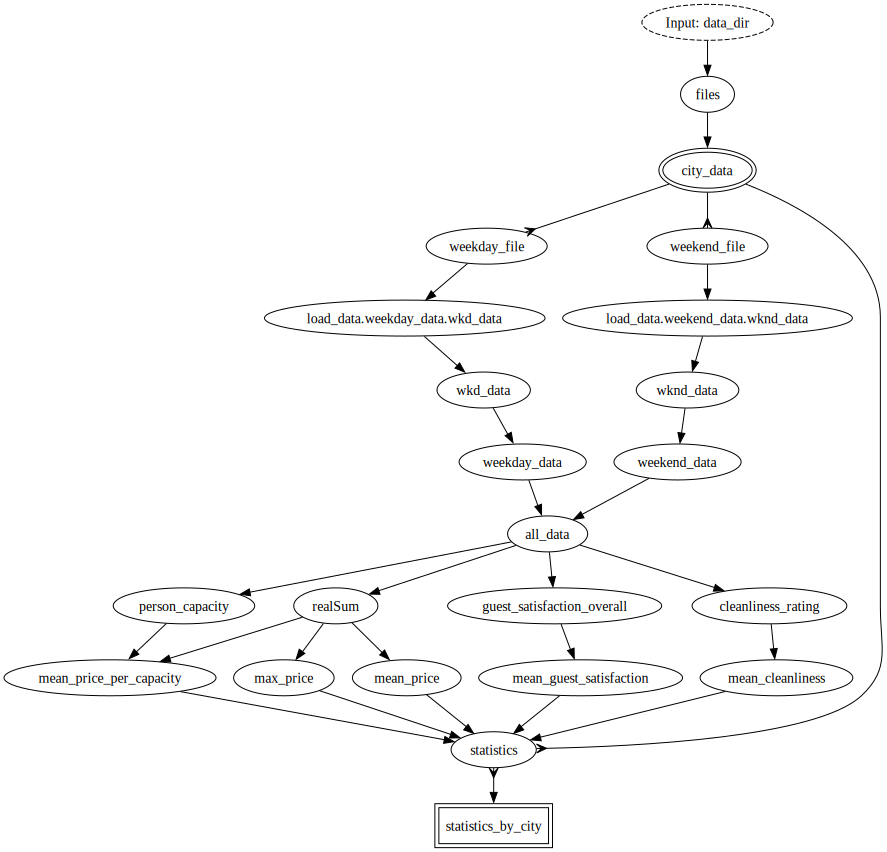

In [5]:
dr.visualize_execution(["statistics_by_city"], "./dag", {}, inputs={"data_dir" : "data"})

In [ ]:
df = dr.execute(["statistics_by_city"], inputs={"data_dir" : "data"})["statistics_by_city"]
df

In [ ]:
df["mean_guest_satisfaction"]\
    .sort_values(ascending=False)\
    .plot(kind="bar", title="Guest satisfaction by city", ylim=(80, 100))

In [ ]:
df["mean_price"]\
    .sort_values(ascending=False).plot(kind="bar")

In [ ]:
s = df["mean_price"]
s.plot()

In [ ]:
df["mean_price_per_person"]\
    .sort_values(ascending=False)\
    .plot(kind="bar")

In [ ]:
df["cleanliness_ratings_mean"]\
    .sort_values(ascending=False)\
    .plot(kind="bar", ylim=(8,10))